In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')


In [2]:
raw_boston_data = pd.read_csv("boston.csv")

In [3]:
raw_boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
raw_boston_data.isnull().sum()

CRIM       0
 ZN        0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
list(raw_boston_data.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [6]:
renamedbostondata = raw_boston_data.rename(columns={
    'CRIM':'crimeratepercapita',
    ' ZN ':'landover25ksqft',
    'INDUS ':'nonretail_landproptn',
    'CHAS':'riverdummy',
    'NOX':'nitrixoxidepp10m',
    'RM':'avgno_rmperdwelling',
    'AGE':'proptnowneroccupied',
    'DIS':'weightedDist',
    'RAD':'radialHighwayaccess',
    'TAX':'proptaxrate_per10K',
    'PTRATIO':'pupilteacherratio',
    'LSTAT':'pctlowerstatus',
    'MEDV':'medianvalue_ks'
    
})

In [7]:
renamedbostondata.head()

,crimeratepercapita,landover25ksqft,nonretail_landproptn,riverdummy,nitrixoxidepp10m,avgno_rmperdwelling,proptnowneroccupied,weightedDist,radialHighwayaccess,proptaxrate_per10K,pupilteacherratio,pctlowerstatus,medianvalue_ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [8]:
print(renamedbostondata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crimeratepercapita      506 non-null float64
landover25ksqft         506 non-null float64
nonretail_landproptn    506 non-null float64
riverdummy              506 non-null int64
nitrixoxidepp10m        506 non-null float64
avgno_rmperdwelling     506 non-null float64
proptnowneroccupied     506 non-null float64
weightedDist            506 non-null float64
radialHighwayaccess     506 non-null int64
proptaxrate_per10K      506 non-null int64
pupilteacherratio       506 non-null float64
pctlowerstatus          506 non-null float64
medianvalue_ks          506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [9]:
renamedbostondata.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crimeratepercapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
landover25ksqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
nonretail_landproptn,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverdummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixoxidepp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
avgno_rmperdwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
proptnowneroccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwayaccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
proptaxrate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [10]:
X = renamedbostondata.drop('crimeratepercapita', axis=1)
y = renamedbostondata[['crimeratepercapita']]

In [11]:
seed = 10

In [12]:
test_data_size = 0.3

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)

In [14]:
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

In [15]:
#Plot a correlation Matrix

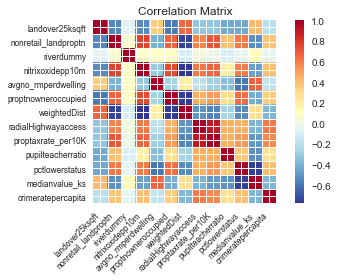

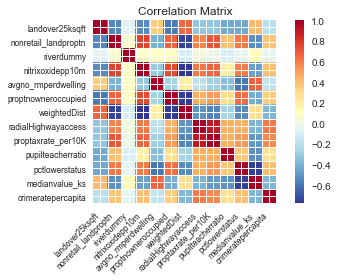

In [16]:
corrMatrix = train_data.corr(method='pearson')
X_names = list(train_data.columns)
y_names = list(train_data.columns)
plot_corr(corrMatrix, xnames=X_names, ynames=y_names, title = None, normcolor=False, cmap='RdYlBu_r')

In [17]:
corrMatrix

,landover25ksqft,nonretail_landproptn,riverdummy,nitrixoxidepp10m,avgno_rmperdwelling,proptnowneroccupied,weightedDist,radialHighwayaccess,proptaxrate_per10K,pupilteacherratio,pctlowerstatus,medianvalue_ks,crimeratepercapita
landover25ksqft,1.000000,-0.540095,-0.059189,-0.520305,0.355346,-0.577457,0.659340,-0.311920,-0.324172,-0.424612,-0.435827,0.422574,-0.198455
nonretail_landproptn,-0.540095,1.000000,0.065271,0.758178,-0.399166,0.667887,-0.728968,0.580813,0.702973,0.398513,0.607457,-0.508338,0.387471
riverdummy,-0.059189,0.065271,1.000000,0.091469,0.107996,0.106329,-0.098551,0.022731,-0.007864,-0.094255,-0.041110,0.136831,-0.044587
nitrixoxidepp10m,-0.520305,0.758178,0.091469,1.000000,-0.306510,0.742016,-0.776311,0.606721,0.662164,0.206809,0.603656,-0.453424,0.405813
avgno_rmperdwelling,0.355346,-0.399166,0.107996,-0.306510,1.000000,-0.263085,0.215439,-0.183000,-0.280341,-0.350828,-0.586573,0.666761,-0.167258
proptnowneroccupied,-0.577457,0.667887,0.106329,0.742016,-0.263085,1.000000,-0.751059,0.458717,0.515376,0.289976,0.639881,-0.419062,0.355730
weightedDist,0.659340,-0.728968,-0.098551,-0.776311,0.215439,-0.751059,1.000000,-0.494932,-0.543333,-0.259140,-0.522120,0.289658,-0.378997
radialHighwayaccess,-0.311920,0.580813,0.022731,0.606721,-0.183000,0.458717,-0.494932,1.000000,0.908578,0.462290,0.456592,-0.383132,0.608838
proptaxrate_per10K,-0.324172,0.702973,-0.007864,0.662164,-0.280341,0.515376,-0.543333,0.908578,1.000000,0.462556,0.528029,-0.478903,0.565035
pupilteacherratio,-0.424612,0.398513,-0.094255,0.206809,-0.350828,0.289976,-0.259140,0.462290,0.462556,1.000000,0.374842,-0.503692,0.276530


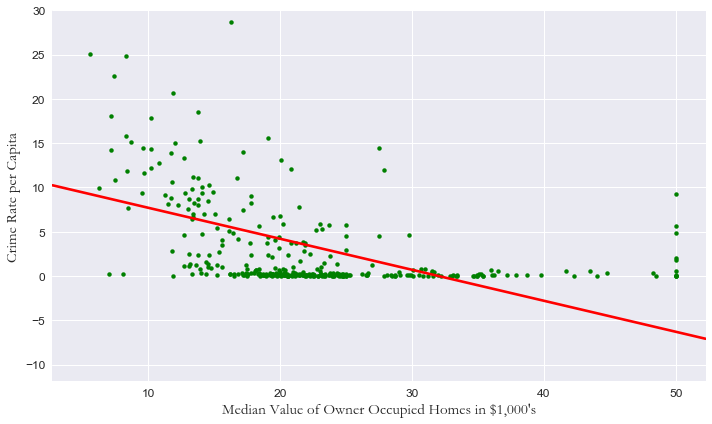

In [40]:
fig, ax = plt.subplots(figsize = (10,6))
sns.regplot(x='medianvalue_ks', y='crimeratepercapita', ci=None, data=train_data, ax=ax, color = 'r',\
            scatter_kws = {'s':20,"color":'green', 'alpha':1})
ax.set_ylabel('Crime Rate per Capita', fontsize=15, fontname='Garamond')
ax.set_xlabel("Median Value of Owner Occupied Homes in $1,000's",\
             fontsize=15, fontname='Garamond')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=30)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

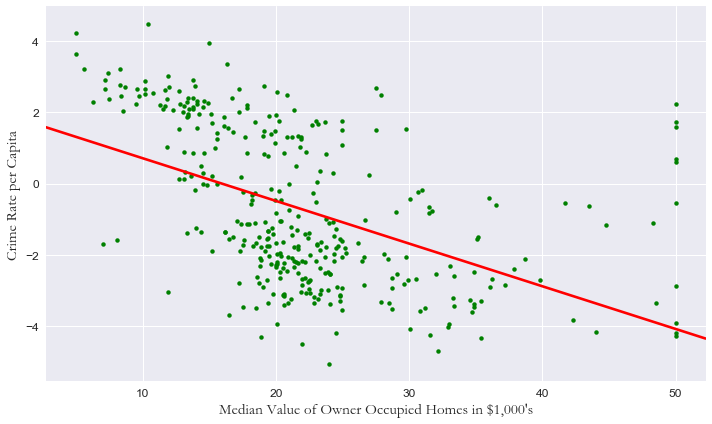

In [44]:
fig, ax = plt.subplots(figsize = (10,6))
y = np.log(train_data['crimeratepercapita'])
#x = np.log(train_data['medianvalue_ks'])
sns.regplot(x='medianvalue_ks', y=y, ci=None, data=train_data, ax=ax, color = 'r',\
            scatter_kws = {'s':20,"color":'green', 'alpha':1})
ax.set_ylabel('Crime Rate per Capita', fontsize=15, fontname='Garamond')
ax.set_xlabel("Median Value of Owner Occupied Homes in $1,000's",\
             fontsize=15, fontname='Garamond')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

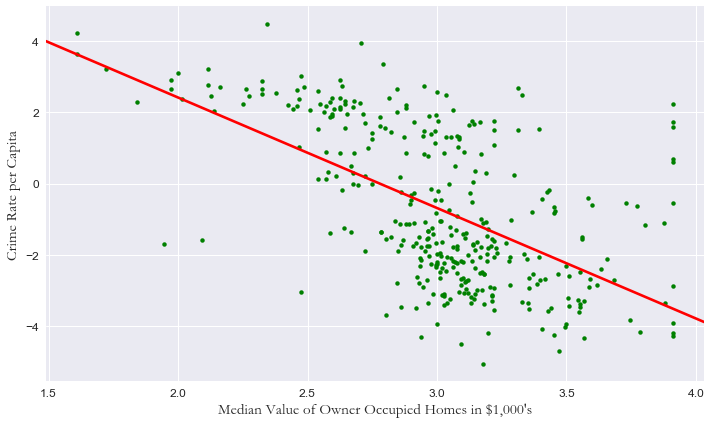

In [47]:
fig, ax = plt.subplots(figsize = (10,6))
y = np.log(train_data['crimeratepercapita'])
x = np.log(train_data['medianvalue_ks'])
sns.regplot(x=x, y=y, ci=None, data=train_data, ax=ax, color = 'r',\
            scatter_kws = {'s':20,"color":'green', 'alpha':1})
ax.set_ylabel('Crime Rate per Capita', fontsize=15, fontname='Garamond')
ax.set_xlabel("Median Value of Owner Occupied Homes in $1,000's",\
             fontsize=15, fontname='Garamond')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

In [49]:
LinearModel = smf.ols(formula = 'crimeratepercapita ~ medianvalue_ks',\
                      data = train_data)

In [50]:
LinearModelResult = LinearModel.fit()

In [51]:
print(LinearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeratepercapita   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     59.02
Date:                Wed, 01 Apr 2020   Prob (F-statistic):           1.56e-13
Time:                        17:08:29   Log-Likelihood:                -1217.4
No. Observations:                 354   AIC:                             2439.
Df Residuals:                     352   BIC:                             2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2094      1.079     10.

In [52]:
LogLinearModel = smf.ols(formula='y ~ medianvalue_ks',\
                        data = train_data)

In [54]:
LogLinearModelResult = LogLinearModel.fit()
print(LogLinearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     109.9
Date:                Wed, 01 Apr 2020   Prob (F-statistic):           1.48e-22
Time:                        17:28:15   Log-Likelihood:                -727.67
No. Observations:                 354   AIC:                             1459.
Df Residuals:                     352   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.9107      0.271      7.

In [63]:
MultiLinearModel = smf.ols(formula = 'crimeratepercapita ~ pctlowerstatus + radialHighwayaccess +\
medianvalue_ks + nitrixoxidepp10m', data = train_data)

In [64]:
MultiLinearModelResult = MultiLinearModel.fit() 

In [67]:
print(MultiLinearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeratepercapita   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     57.77
Date:                Wed, 01 Apr 2020   Prob (F-statistic):           2.19e-37
Time:                        17:49:20   Log-Likelihood:                -1154.9
No. Observations:                 354   AIC:                             2320.
Df Residuals:                     349   BIC:                             2339.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.8912    

In [72]:
LogMultiLinearModel = smf.ols(formula = 'np.log(crimeratepercapita) ~ pctlowerstatus + radialHighwayaccess +\
medianvalue_ks + nitrixoxidepp10m', data = train_data)

In [73]:
LogMultiLinearModelResult = LogMultiLinearModel.fit()

In [74]:
print(LogMultiLinearModelResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeratepercapita)   R-squared:                       0.853
Model:                                    OLS   Adj. R-squared:                  0.851
Method:                         Least Squares   F-statistic:                     504.4
Date:                        Wed, 01 Apr 2020   Prob (F-statistic):          1.29e-143
Time:                                18:26:57   Log-Likelihood:                -436.94
No. Observations:                         354   AIC:                             883.9
Df Residuals:                             349   BIC:                             903.2
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------